# Coarse models
Here, we model the joint probability distribution over a set of binary neurons using 2 different simplistic models. We consider the maximum entropy distribution that reproduces the *probability that K cells spike*, the population count model, and distribution that reproduces the *mean probability of neurons spiking*, the independent model. 

## Independent Model

### Set no. of neurons/spins

In [1]:
NN = 2

2

### Construct the Hamiltonian

In [2]:
Hamiltonian = Sum[ H[i] s[i], {i, 1, NN}] // Expand

H[1] s[1] + H[2] s[2]

### Construct the partition function `Z`
We chose to represent a neuron firing with a 1 and it being silent with a 0.

In [3]:
spinvals = (PadLeft[IntegerDigits[#, 2], NN] & /@ 
     Range[0, 2^NN - 1]) 
reps = Table[s[i] -> #[[i]], {i, NN}] & /@ spinvals
Z = Total[(Exp[-Hamiltonian] /. reps)] // ExpToTrig // FullSimplify

{{0, 0}, {0, 1}, {1, 0}, {1, 1}}
{{s[1] -> 0, s[2] -> 0}, {s[1] -> 0, s[2] -> 1}, {s[1] -> 1, s[2] -> 0}, 
 
>   {s[1] -> 1, s[2] -> 1}}
 -H[1] - H[2]       H[1]        H[2]
E             (1 + E    ) (1 + E    )

### Construct the probability distribution `p`

H[1] + H[2] - H[1] s[1] - H[2] s[2]
E
------------------------------------
            H[1]        H[2]
      (1 + E    ) (1 + E    )
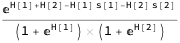

In [6]:
pInd = Exp[-Hamiltonian]/Z 

### Compute the expectations

1          1
{---------, ---------}
      H[1]       H[2]
 1 + E      1 + E
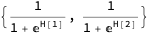

In [7]:
Averages = Table[ Total[s[i] pInd /. reps] // ExpToTrig // FullSimplify, {i,NN} ] 

### Solve for `H` given observed expectations
Let us say that each neuron `i` has an expected value `a[i]`. We can solve for `H[i]` in terms of each `a[i]`. 

1 - a[1]
{{H[1] -> ConditionalExpression[Log[--------], 0 < a[1] < 1 && 0 < a[2] < 1], 
                                      a[1]
 
                                       1 - a[2]
>    H[2] -> ConditionalExpression[Log[--------], 0 < a[1] < 1 && 0 < a[2] < 1]}}
                                         a[2]
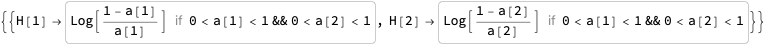

In [8]:
Solve[Averages[[#]] == a[#]& /@ Range[NN], H[#]& /@ Range[NN], Reals] 

## Population Count Model
The population count model is a bit simpler. It needs to reproduce the probability that `K` neurons fire, which is measured experimentally. All states where `K` neurons fire are assumed to be equally probable, thus we divide the experimentally measured probabilities `pK` among the `N` choose `K` states. Thus, we have a model of the form:

pK[s[1] + s[2]]
------------------------
Binomial[2, s[1] + s[2]]
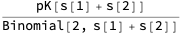

In [29]:
pCount = pK[#]/ Binomial[NN, #] &[Sum[s[i],{i,NN}]]